## Retail Analysis with Walmart Data


### DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

#### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- **Store** - the store number

- **Date** - the week of sales

- **Weekly_Sales** -  sales for the given store

- **Holiday_Flag** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

- **Temperature** - Temperature on the day of sale

- **Fuel_Price** - Cost of fuel in the region

- **CPI** – Prevailing consumer price index

- **Unemployment** - Prevailing unemployment rate

#### Holiday Events

- **Super Bowl:** 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- **Labour Day:** 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- **Thanksgiving:** 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- **Christmas:** 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Analysis Tasks

#### Basic Statistics tasks

- Which store has maximum sales

- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

- Which store/s has good quarterly growth rate in Q3’2012

- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

- Provide a monthly and semester view of sales in units and give insights

#### Statistical Model

For Store 1 – Build  prediction models to forecast demand

- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating new variable.

### Solution & Analysis

#### Import the libraries

In [97]:
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import scipy.stats as st

#### Import the Walmart Store Data

In [98]:
retail_data=pd.read_csv('Walmart_Store_sales.csv')
retail_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [99]:
retail_data.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

#### Which store has maximum sales ?

In [100]:
maximum_sales=retail_data.groupby('Store', as_index=False).agg({'Weekly_Sales':sum})
maximum_sales=maximum_sales.reset_index()
maximum_sales.head()

,index,Store,Weekly_Sales
0,0,1,2.224028e+08
1,1,2,2.753824e+08
2,2,3,5.758674e+07
3,3,4,2.995440e+08
4,4,5,4.547569e+07


- The Store with the maximum Sales is: **Store 20**

In [101]:
maximum_sales.loc[maximum_sales['Weekly_Sales']==maximum_sales['Weekly_Sales'].max()]

,index,Store,Weekly_Sales
19,19,20,3.013978e+08


#### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?

In [102]:
store_deviation=retail_data.groupby('Store', as_index=False).agg({'Weekly_Sales':['std','mean']})
store_deviation=store_deviation.reset_index()
store_deviation['CoV']=(store_deviation[('Weekly_Sales', 'std')]/store_deviation[('Weekly_Sales', 'mean')])*100
store_deviation.head()

index Store   Weekly_Sales                      CoV
                         std          mean           
0     0     1  155980.767761  1.555264e+06  10.029212
1     1     2  237683.694682  1.925751e+06  12.342388
2     2     3   46319.631557  4.027044e+05  11.502141
3     3     4  266201.442297  2.094713e+06  12.708254
4     4     5   37737.965745  3.180118e+05  11.866844

- The Store with the maximum Standard Deviation is: **Store 14**

In [103]:
store_deviation.loc[store_deviation[('Weekly_Sales', 'std')]==store_deviation[('Weekly_Sales', 'std')].max()]

index Store   Weekly_Sales                      CoV
                          std          mean           
13    13    14  317569.949476  2.020978e+06  15.713674

#### Which store/s has good quarterly growth rate in Q3’2012?

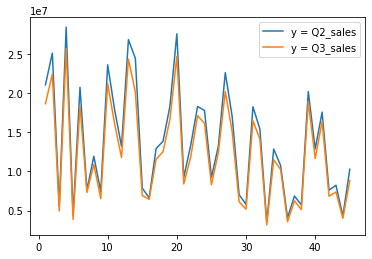

In [104]:
# Convert the Date coulumn data type to DateTime
retail_data.Date=pd.to_datetime(retail_data.Date)

#defining the start and end date Quarter 2(Q2)
Q2_start =  pd.to_datetime(date(2012,4,1))
Q2_end =  pd.to_datetime(date(2012,6,30))

#defining the start and end date Quarter 3(Q3)
Q3_start = pd.Timestamp(date(2012,7,1))
Q3_end = pd.Timestamp(date(2012,9,30))

#Extract Q2 & Q3 Data
Q2_data=retail_data[(retail_data.Date > Q2_start) & (retail_data.Date < Q2_end)]
Q3_data=retail_data[(retail_data.Date > Q3_start) & (retail_data.Date < Q3_end)]

#Find the sum of sales of all Stores in Q2
Q2_sales=Q2_data.groupby('Store', as_index=False).agg({'Weekly_Sales':sum})
Q2_sales=Q2_sales.reset_index()
Q2_sales.rename(columns={'Weekly_Sales': 'Total_Sales'},inplace=True)

#Find the sum of sales of all Stores in Q3
Q3_sales=Q3_data.groupby('Store').agg({'Weekly_Sales':sum})
Q3_sales=Q3_sales.reset_index()
Q3_sales.rename(columns={'Weekly_Sales': 'Total_Sales'},inplace=True)

plt.plot(retail_data.Store.unique(), Q2_sales.Total_Sales)
plt.plot(retail_data.Store.unique(), Q3_sales.Total_Sales)

plt.legend(['y = Q2_sales', 'y = Q3_sales'], loc='upper right')

plt.show()

- Based on the above graph, its clear that the Q3 results are not better than Q2. Hence the store with the minimum loss is: **Store 16**

In [105]:
Q3_sales['Growth_Rate']=(Q3_sales.Total_Sales - Q2_sales.Total_Sales)/Q2_sales.Total_Sales
Q3_sales.loc[Q3_sales.Growth_Rate == Q3_sales.Growth_Rate.max()]

,Store,Total_Sales,Growth_Rate
15,16,6441311.11,-0.027893


#### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?

In [106]:
#Mark all the holiday dates
holiday_dates={}
holiday_dates['Super Bowl']=[pd.to_datetime(date(2010,2,12)), pd.to_datetime(date(2011,2,11)), 
                             pd.to_datetime(date(2012,2,10)), pd.to_datetime(date(2013,2,8))]
holiday_dates['Labour Day']=[pd.to_datetime(date(2010,9,10)), pd.to_datetime(date(2011,9,9)), 
                             pd.to_datetime(date(2012,9,7)), pd.to_datetime(date(2013,9,6))]
holiday_dates['Thanks Giving']=[pd.to_datetime(date(2010,11,26)), pd.to_datetime(date(2011,11,25)), 
                                pd.to_datetime(date(2012,11,23)), pd.to_datetime(date(2013,11,29))]
holiday_dates['Christmas']=[pd.to_datetime(date(2010,12,31)), pd.to_datetime(date(2011,12,30)), 
                            pd.to_datetime(date(2012,12,28)), pd.to_datetime(date(2013,12,27))]

#Get the mean of Sales for different type of holidays
SuperBowlSalesMean=retail_data[retail_data.Date.isin(holiday_dates['Super Bowl'])]['Weekly_Sales'].mean()
LabourDaySalesMean=retail_data[retail_data.Date.isin(holiday_dates['Labour Day'])]['Weekly_Sales'].mean()
ThanksGivingSalesMean=retail_data[retail_data.Date.isin(holiday_dates['Thanks Giving'])]['Weekly_Sales'].mean()
ChristmasSalesMean=retail_data[retail_data.Date.isin(holiday_dates['Christmas'])]['Weekly_Sales'].mean()
NonHolidaySalesMean=retail_data[retail_data.Holiday_Flag == 0]['Weekly_Sales'].mean()

- Holidays which have higher sales than the mean sales in non-holiday season for all stores together is: **Thanks Giving**

In [107]:
print('The mean of Sales for Super Bowl is: ',SuperBowlSalesMean)
print('The mean of Sales for Labour Day is: ',LabourDaySalesMean)
print('The mean of Sales for Thanks Giving is: ',ThanksGivingSalesMean)
print('The mean of Sales for Christmas is: ',ChristmasSalesMean)
print('The mean of Sales for Non Holidays is: ',NonHolidaySalesMean)

The mean of Sales for Super Bowl is:  nan
The mean of Sales for Labour Day is:  1039182.8339999999
The mean of Sales for Thanks Giving is:  1471273.427777778
The mean of Sales for Christmas is:  960833.1115555555
The mean of Sales for Non Holidays is:  1041256.3802088555


#### Provide a monthly and semester view of sales in units and give insights

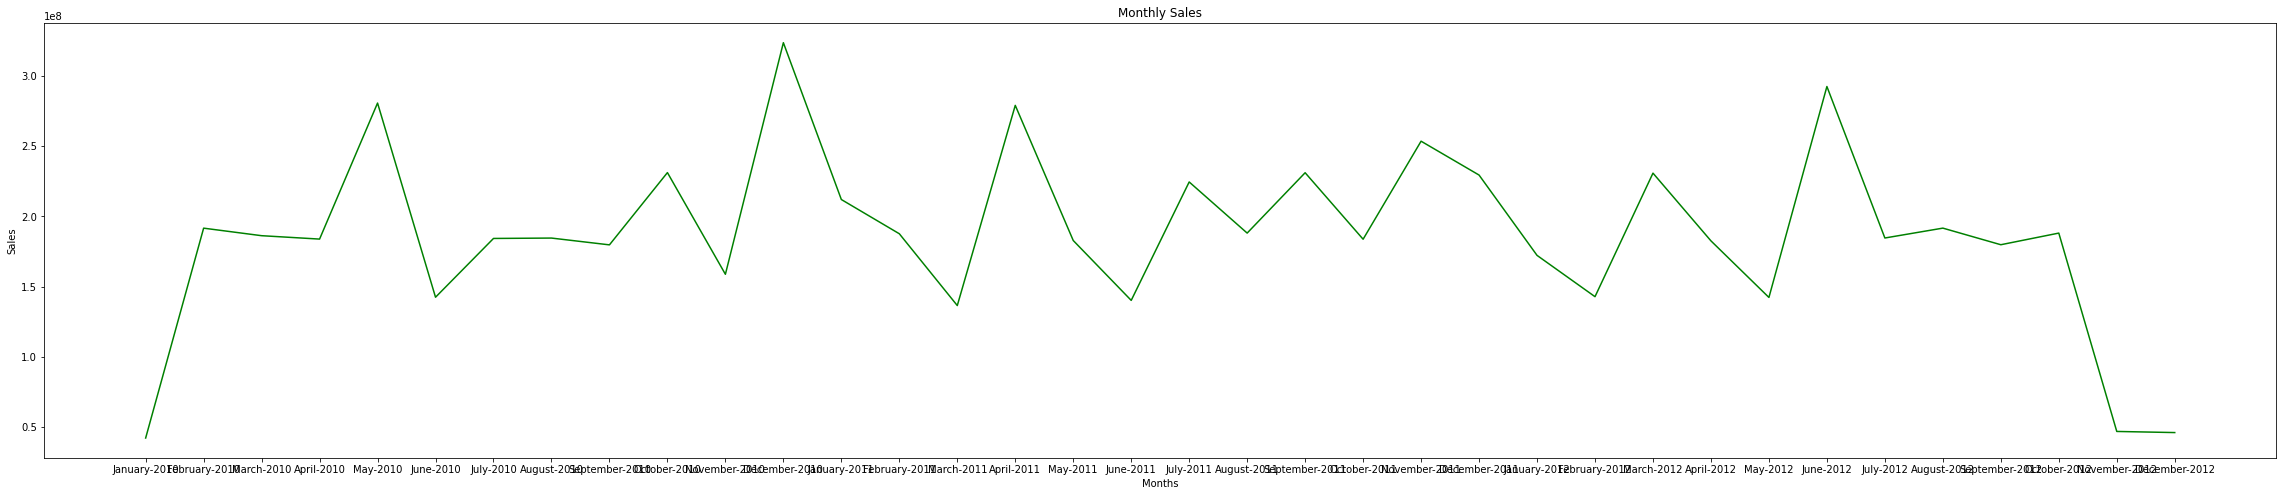

In [108]:
monthly_sales=retail_data.groupby(pd.Grouper(key='Date',freq='1M')).sum()
monthly_sales=monthly_sales.reindex()
fig, ax = plt.subplots(figsize=(40,8))
plt.plot(monthly_sales.index.strftime('%B-%Y'),monthly_sales.Weekly_Sales,color="green")
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

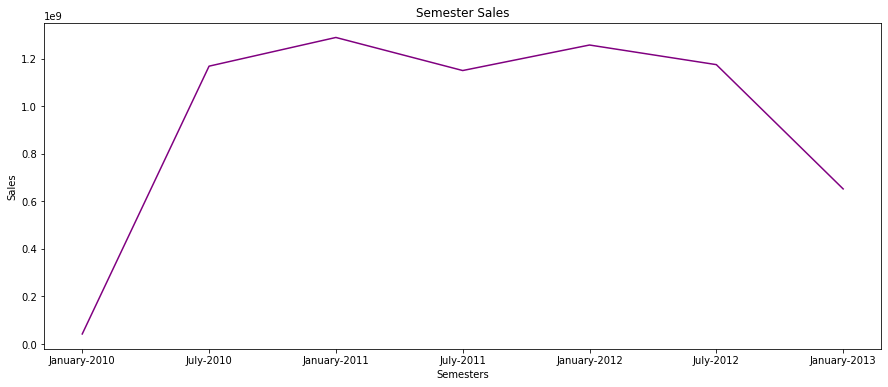

In [109]:
semester_sales=retail_data.groupby(pd.Grouper(key='Date',freq='6M')).sum()
semester_sales=semester_sales.reindex()
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(semester_sales.index.strftime('%B-%Y'),semester_sales.Weekly_Sales,color="purple")
plt.title('Semester Sales')
plt.xlabel('Semesters')
plt.ylabel('Sales')
plt.show()

#### Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales

In [110]:
store1_data=retail_data[retail_data.Store==1]
store1_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


Correlation Coefficient of Weekly_Sales with Unemployment is :  -0.10617608965795426


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

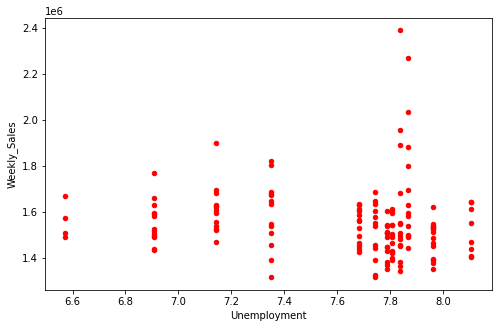

In [111]:
print("Correlation Coefficient of Weekly_Sales with Unemployment is : ", retail_data.Weekly_Sales.corr(retail_data.Unemployment))
store1_data.plot(kind="scatter",x="Unemployment",y="Weekly_Sales",figsize=(8,5),color="red")

Correlation Coefficient of Weekly_Sales with CPI is :  -0.07263416204017627


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

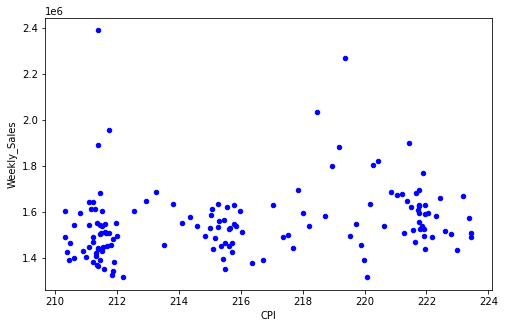

In [112]:
print("Correlation Coefficient of Weekly_Sales with CPI is : ", retail_data.Weekly_Sales.corr(retail_data.CPI))
store1_data.plot(kind="scatter",x="CPI",y="Weekly_Sales",figsize=(8,5),color="blue")

Correlation Coefficient of Weekly_Sales with Fuel_Price is :  0.00946378631447511


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

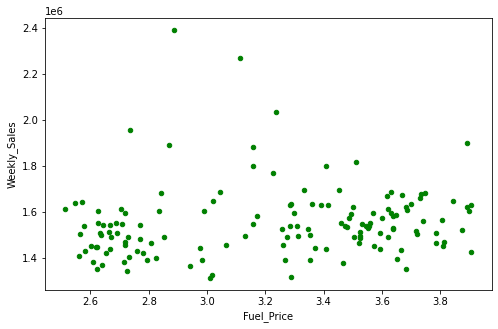

In [113]:
print("Correlation Coefficient of Weekly_Sales with Fuel_Price is : ", retail_data.Weekly_Sales.corr(retail_data.Fuel_Price))
store1_data.plot(kind="scatter",x="Fuel_Price",y="Weekly_Sales",figsize=(8,5),color="green")

In [114]:
train,test=train_test_split(retail_data,test_size=0.30,random_state=12345)
model=sm.ols(formula='Weekly_Sales~Unemployment+CPI+Fuel_Price',data=train)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     36.11
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           4.75e-23
Time:                        18:41:19   Log-Likelihood:                -65955.
No. Observations:                4504   AIC:                         1.319e+05
Df Residuals:                    4500   BIC:                         1.319e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.689e+06   9.45e+04     17.882      0.000     1.5e+06    1.87e+06
Unemployment -4.519e+04   4617.347     -9.787      0.000   -5.42e+04   -3.61e+04
CPI          -1419.8873    223.913     -6.341      0.000   -1858.867    -980.907
Fuel_Price   -1.399e+04   1.84e+04     -0.761      0.447   -5.01e+04    2.21e+04
==============================================================================
Omnibus:                      263.315   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.069
Skew:                           0.643   Prob(JB):                     2.83e-68
Kurtosis:                       3.058   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**INTERPRETATION**

Based on the **Correlation Co-efficient** and the **Regression Model**: 
- The probability of F-statistics for **CPI** & **Unemployment** is 0.
- The Co-rrelation co-efficient of **CPI** & **Unemployment** is negative and significant.
- The proabibility of F-statistics for **Fuel_Price** is higher than the threshold.
- The Co-rrelation co-efficient is very smalle for **Fuel_Price**

Hence, its clear that **CPI** & **Unemployment** have a negative impact and there is no or negligible impact of **Fuel_Price** on **Weekly_Sales**



#### Change dates into days by creating new variable.

In [115]:
retail_data['Day']=pd.to_datetime(retail_data.Date).dt.day_name()
retail_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday
